In [66]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report
sns.set(color_codes=True)

In [67]:
data = pd.read_csv("bank-full.csv")
df = pd.DataFrame(data)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [68]:
print(df.shape)
print("The data has 45211 rows and 17 columns")

(45211, 17)
The data has 45211 rows and 17 columns


In [69]:
print(df.info())
print("The columns 'age', 'balance', 'day', 'duration', 'campaign', 'pdays' and 'previous' are of the type 'int64'")
print("All other columns are of the type 'object'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
The columns 'age', 'balance', 'day', 'duration', 'campaign', 'pdays' and 'previous' are of the type 'int64'
All other columns are of the type 'object'


In [70]:
print(df.isna().apply(pd.value_counts))
print("There do not seem to be any missing values")

         age    job  marital  education  default  balance  housing   loan  \
False  45211  45211    45211      45211    45211    45211    45211  45211   

       contact    day  month  duration  campaign  pdays  previous  poutcome  \
False    45211  45211  45211     45211     45211  45211     45211     45211   

       Target  
False   45211  
There do not seem to be any missing values


In [71]:
print(df.describe().T)
print("The 5 point summary is given in the last 5 columns, with negative values for minimum of balance and all of pdays except max")

            count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  
The 5 point summary is given in the last 5 columns, with negative values for minimum of balance and all of pdays except max


Contains outliers


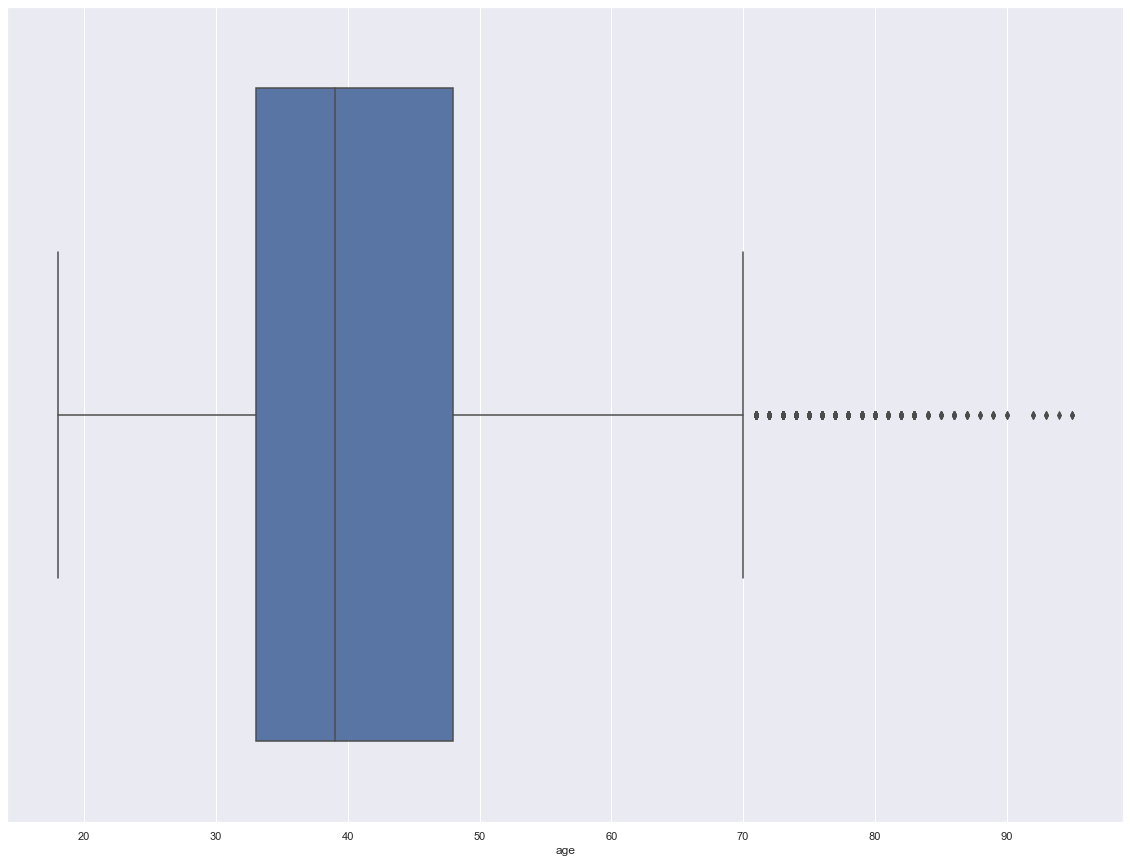

In [72]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df.age)
print('Contains outliers')

Contains outliers


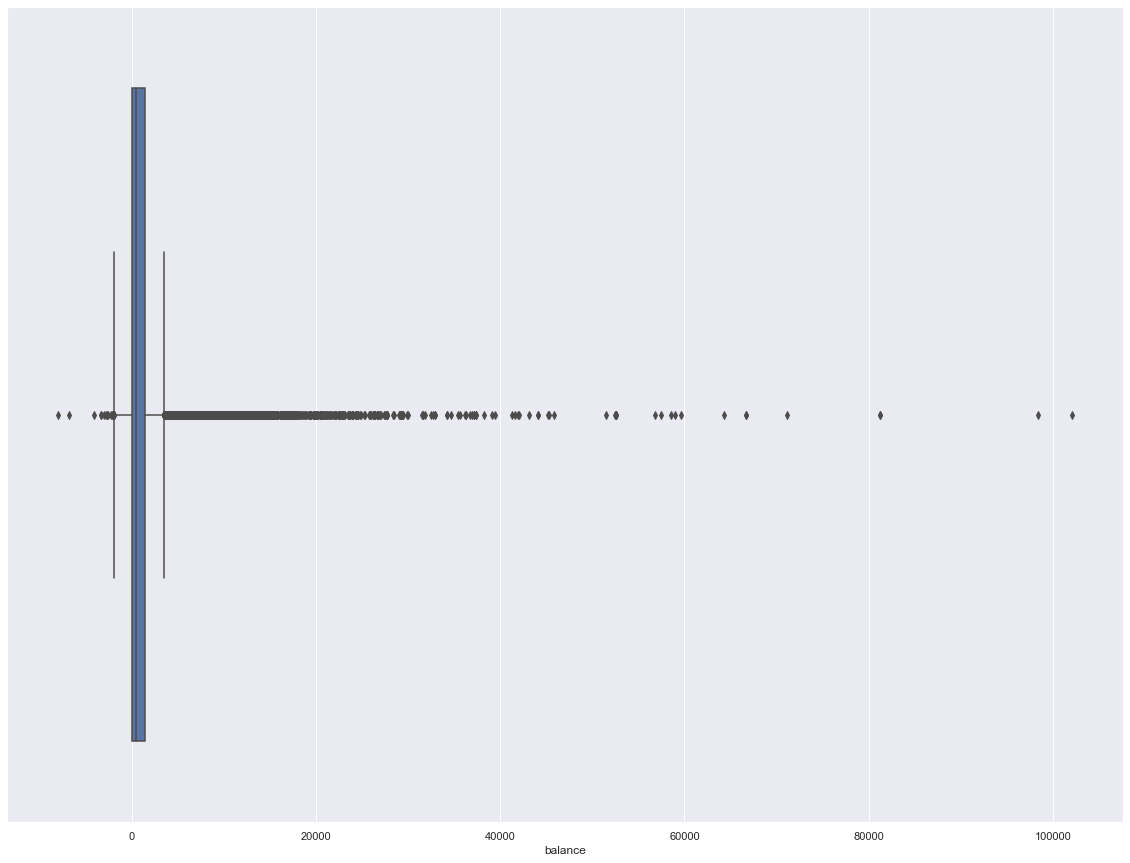

In [73]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df.balance)
print('Contains outliers')

does not contain outliers


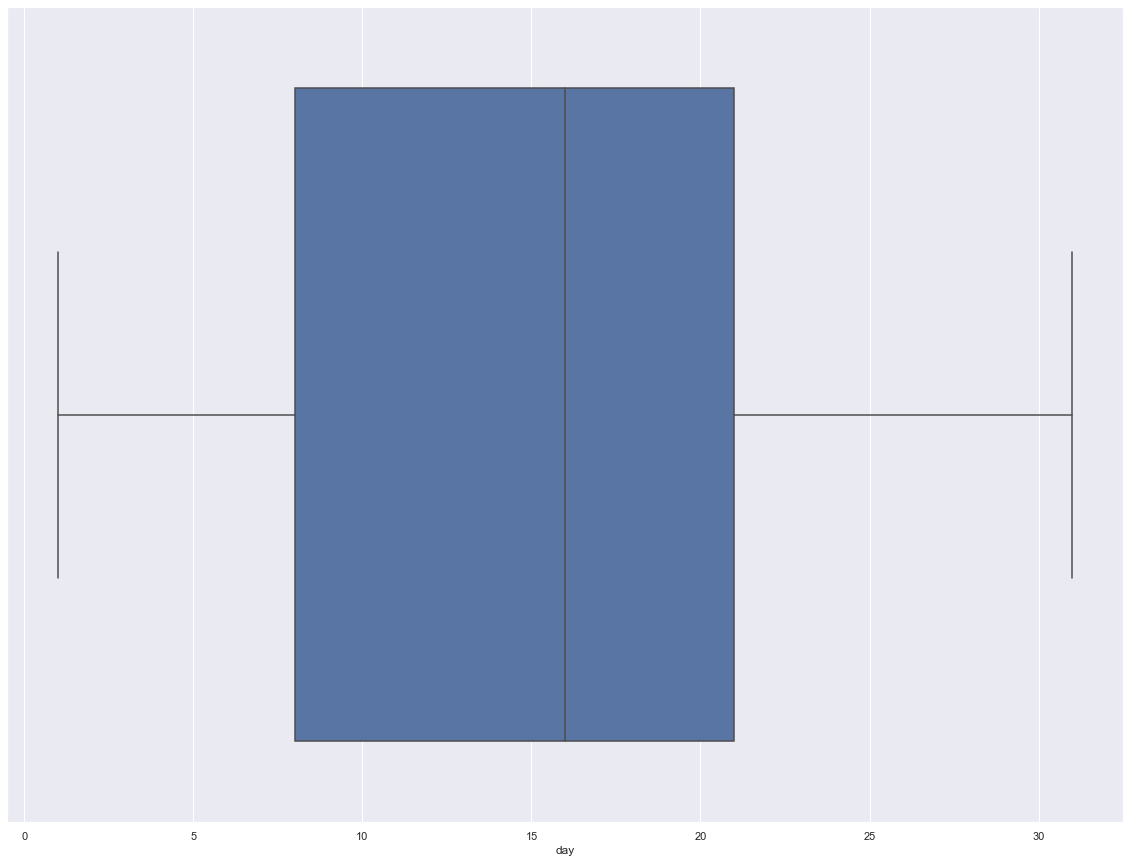

In [74]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df.day)
print('does not contain outliers')

Contains outliers


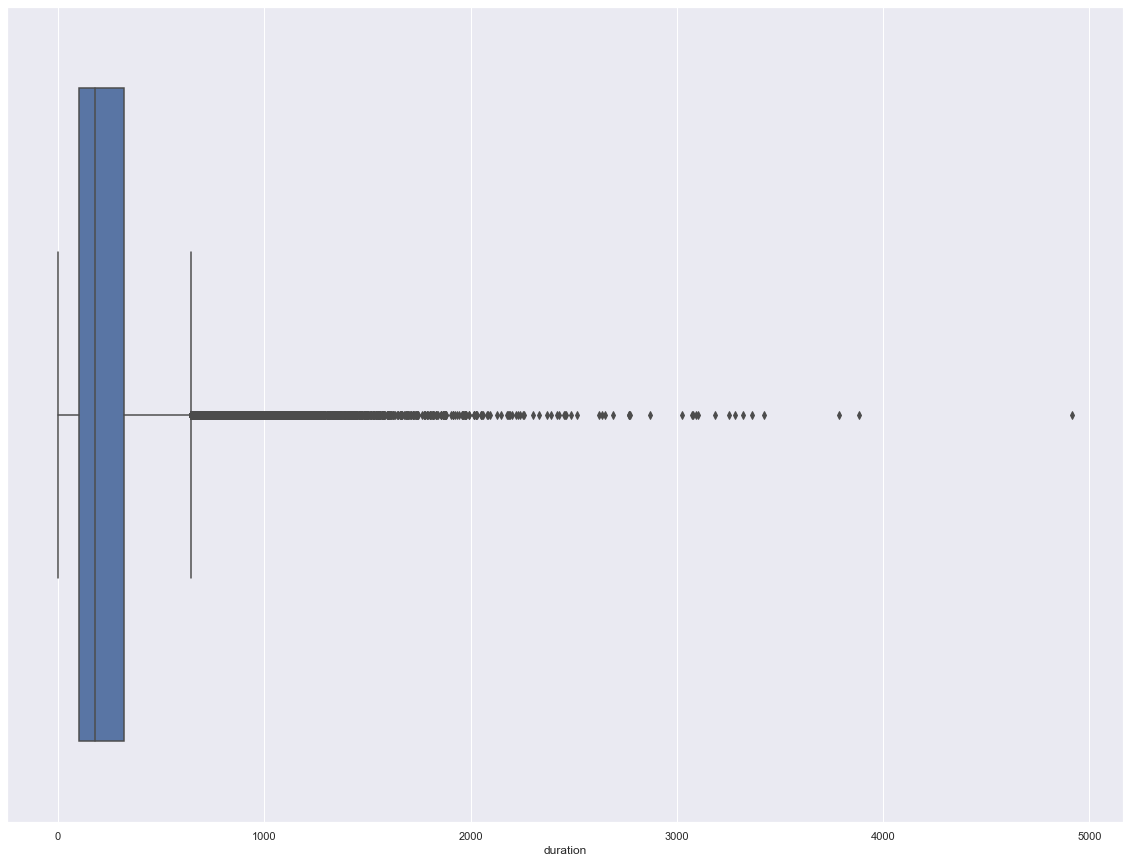

In [75]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df.duration)
print('Contains outliers')

Contains outliers


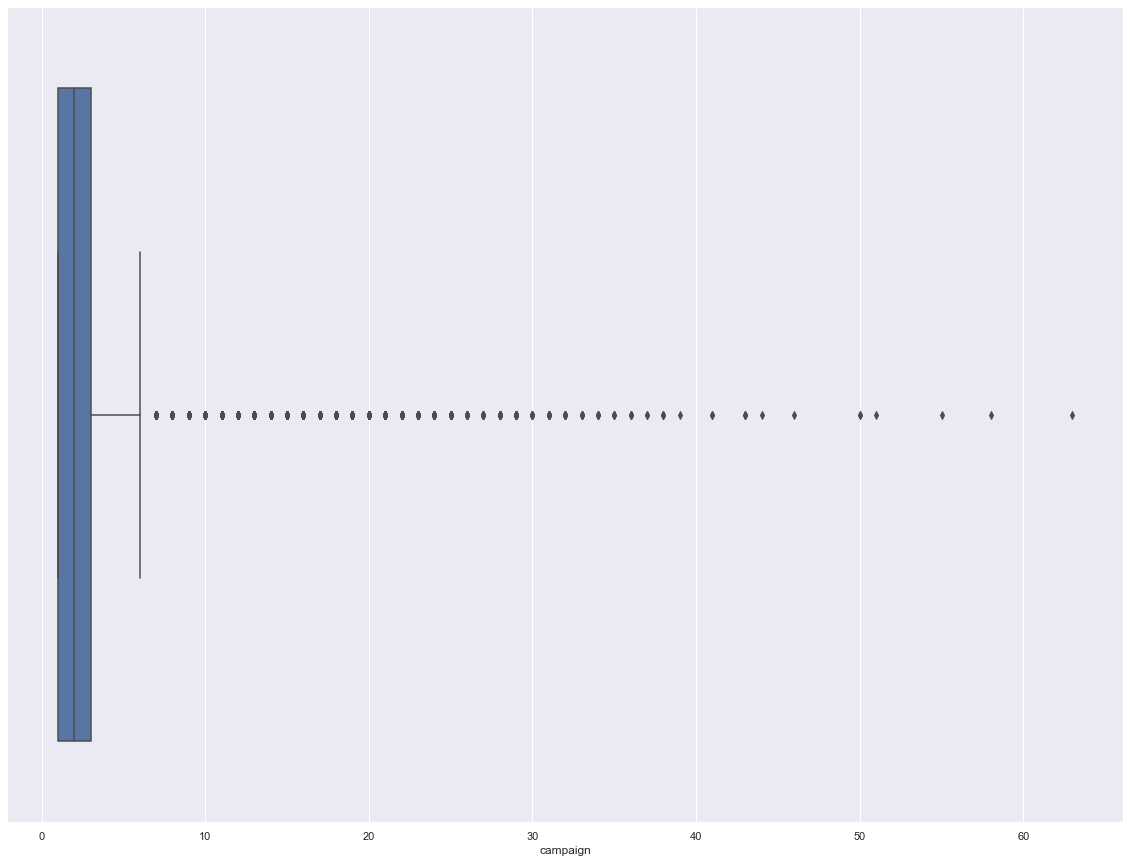

In [76]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df.campaign)
print('Contains outliers')

Contains outliers


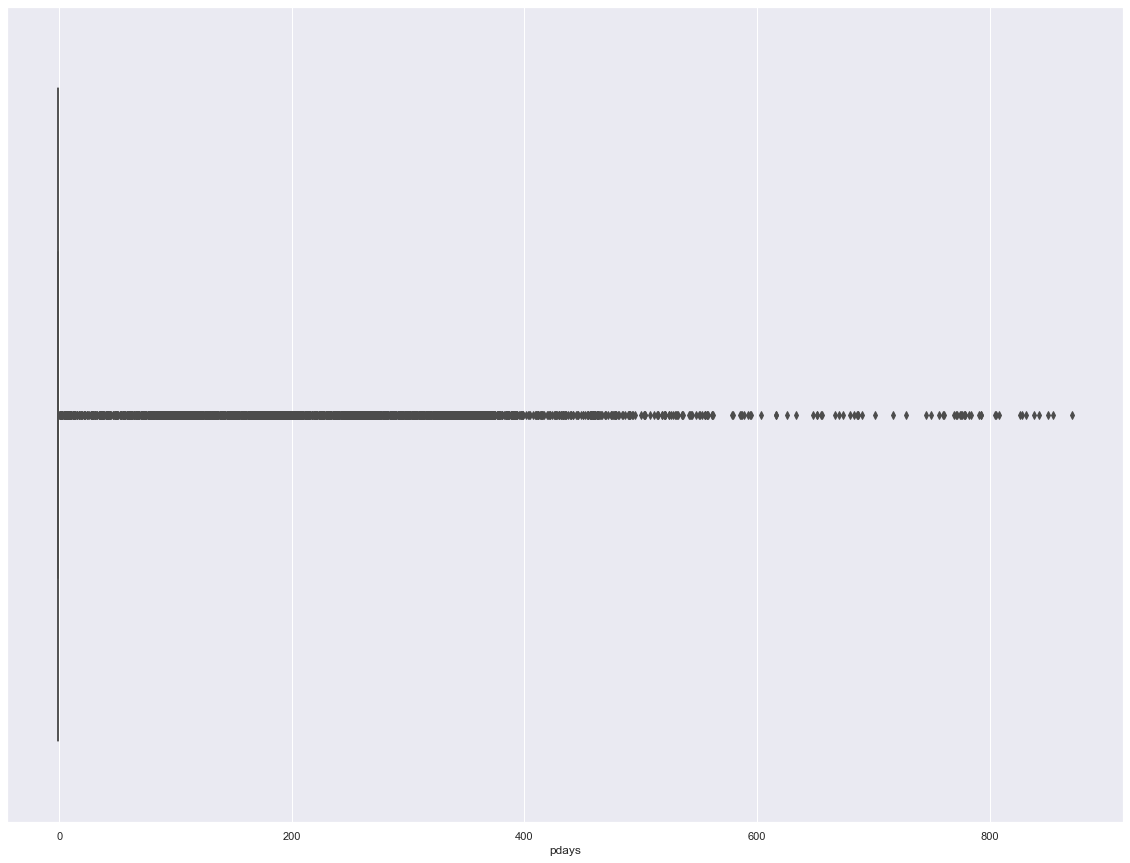

In [77]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df.pdays)
print('Contains outliers')

Contains outliers


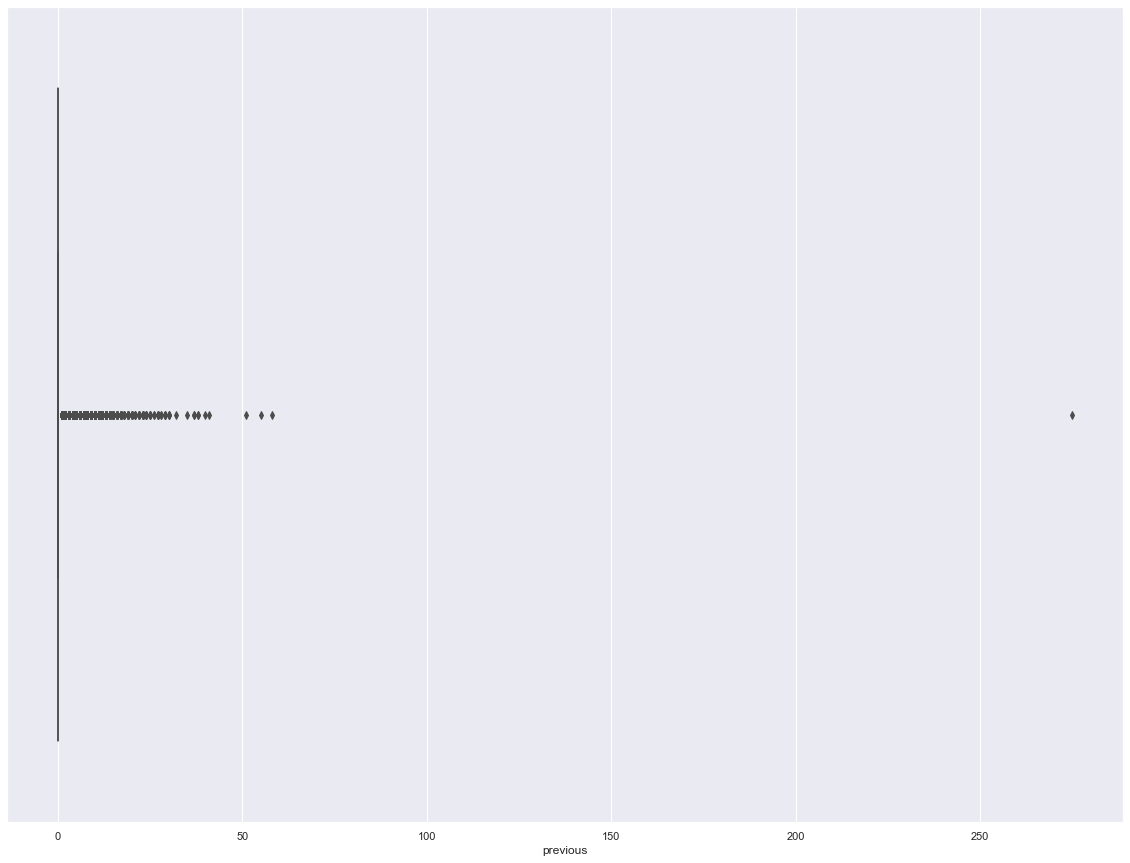

In [78]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df.previous)
print('Contains outliers')

In [79]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [80]:
print(df.isna().apply(pd.value_counts))
print("There still do not seem to be any missing values, even among categorical variables")

         age    job  marital  education  default  balance  housing   loan  \
False  45211  45211    45211      45211    45211    45211    45211  45211   

       contact    day  month  duration  campaign  pdays  previous  poutcome  \
False    45211  45211  45211     45211     45211  45211     45211     45211   

       Target  
False   45211  
There still do not seem to be any missing values, even among categorical variables


In [81]:
replaceStruct = {
                "education": {"primary": 1, "secondary":2 , "tertiary": 3,"unknown": -1},
                 "default":     {"no": 1, "yes": 2},
                "housing":     {"no": 1, "yes": 2},
                "loan":     {"no": 0, "yes": 1}, 
                "Target":     {"no": 1, "yes": 2 }
                }
oneHotCols=["job","marital","contact","month","poutcome"]

In [82]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df,columns=oneHotCols)
df.head(10)

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,1,2143,2,0,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,44,2,1,29,2,0,5,151,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,33,2,1,2,2,1,5,76,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,47,-1,1,1506,2,0,5,92,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,33,-1,1,1,1,0,5,198,1,-1,...,0,0,1,0,0,0,0,0,0,1
5,35,3,1,231,2,0,5,139,1,-1,...,0,0,1,0,0,0,0,0,0,1
6,28,3,1,447,2,1,5,217,1,-1,...,0,0,1,0,0,0,0,0,0,1
7,42,3,2,2,2,0,5,380,1,-1,...,0,0,1,0,0,0,0,0,0,1
8,58,1,1,121,2,0,5,50,1,-1,...,0,0,1,0,0,0,0,0,0,1
9,43,2,1,593,2,0,5,55,1,-1,...,0,0,1,0,0,0,0,0,0,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 46 columns):
age                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
Target               45211 non-null int64
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
job_self-employed    45211 non-null uint8
job_services         45211 non-null uint8
job_student          45211 non-null uint8
job_techn

In [84]:
X = df.drop('Target',axis=1) 
Y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [85]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
y_predict=model.predict(x_test)
print("Model Performance:",model_score)

Model Performance: 0.9015039811265113


Logistic Regression


(2.0, 0.0)

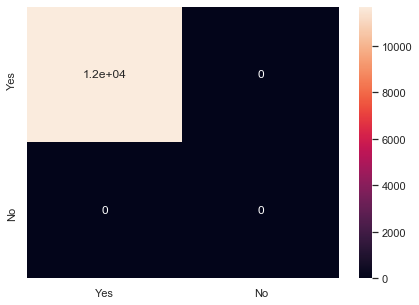

In [86]:
print("Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [87]:
print( 'Total Accuracy : ',metrics.accuracy_score( y_test, y_predict))

Total Accuracy :  0.9015039811265113


In [88]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.92      0.97      0.95     12013
           2       0.63      0.34      0.44      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [89]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)

In [90]:
NNH.score(x_test,y_test)

0.882261869654969

KNN


(2.0, 0.0)

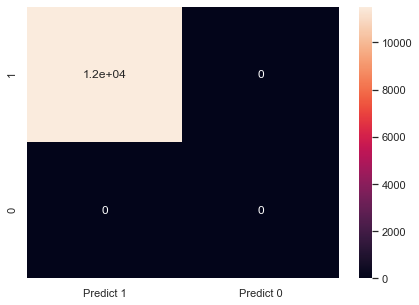

In [91]:
print("KNN")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [92]:
print( 'Total Accuracy : ',metrics.accuracy_score( y_test, predicted_labels))

Total Accuracy :  0.882261869654969


In [93]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           1       0.91      0.96      0.94     12013
           2       0.48      0.29      0.36      1551

    accuracy                           0.88     13564
   macro avg       0.69      0.62      0.65     13564
weighted avg       0.86      0.88      0.87     13564



In [94]:
diab_model = GaussianNB()
diab_model.fit(x_train, y_train.ravel())
diab_train_predict = diab_model.predict(x_train)
print("Training model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))

Training model Accuracy: 0.8537


In [95]:
diab_test_predict = diab_model.predict(x_test)
print("Testing model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))

Testing model Accuracy: 0.8517


Naive Bayes


(2.0, 0.0)

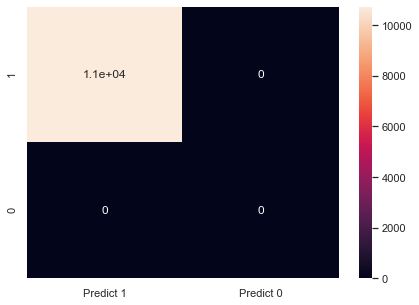

In [96]:
print("Naive Bayes")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [97]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, diab_test_predict))

Total Accuracy :  0.8517398997345915


In [98]:
print(classification_report(y_test, diab_test_predict))

              precision    recall  f1-score   support

           1       0.94      0.89      0.91     12013
           2       0.39      0.53      0.45      1551

    accuracy                           0.85     13564
   macro avg       0.66      0.71      0.68     13564
weighted avg       0.87      0.85      0.86     13564



In [99]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [100]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.8776172220583899


Decision Tree


(2.5, -0.5)

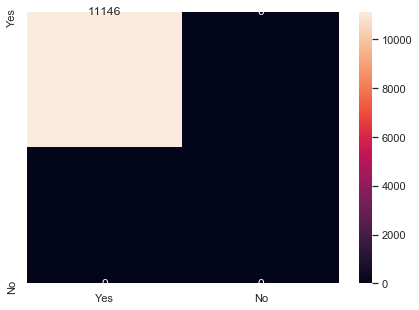

In [101]:
print("Decision Tree")
y_predict = dTree.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [102]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, y_predict))

Total Accuracy :  0.8776172220583899


In [103]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93     12013
           2       0.47      0.49      0.48      1551

    accuracy                           0.88     13564
   macro avg       0.70      0.71      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [104]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9005276961481341
0.9019463285166618


In [105]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                        Imp
age                0.051436
education          0.000000
default            0.000000
balance            0.000000
housing            0.000000
loan               0.000000
day                0.000000
duration           0.606017
campaign           0.000000
pdays              0.000000
previous           0.000000
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.000000
contact_cellular   0.005901
contact_telephone  0.000000
contact_unknown    0.000000
month_apr          0.000000
month_aug          0.000000
month_dec          0.000000
month_feb          0.000000
month_jan          0.000000
month_jul          0

Decision Tree Pruned


(4.5, -2.5)

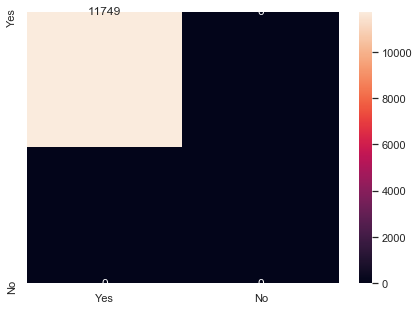

In [106]:
print("Decision Tree Pruned")
y_predict = dTreeR.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 2, top - 2)

In [107]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, y_predict))

Total Accuracy :  0.9019463285166618


In [108]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95     12013
           2       0.65      0.31      0.42      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.68     13564
weighted avg       0.89      0.90      0.89     13564



In [109]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, y_train)
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.9996524157108099
0.907844293718667


Bagging Classifier


(5.0, -3.0)

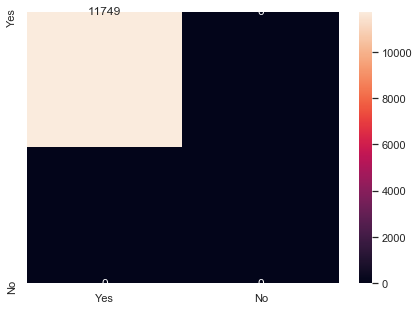

In [110]:
print("Bagging Classifier")
y_predict = bgcl.predict(x_test)
df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [111]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, y_predict))

Total Accuracy :  0.907844293718667


In [112]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95     12013
           2       0.62      0.51      0.56      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.73      0.75     13564
weighted avg       0.90      0.91      0.90     13564



In [113]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)
print(gbcl.score(x_train,y_train))
print(gbcl.score(x_test,y_test))

0.9071949947862357
0.904379239162489


Gradient Booster


(6.5, -4.5)

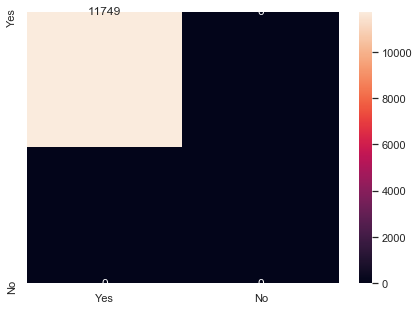

In [123]:
y_predict = gbcl.predict(x_test)
print("Gradient Booster")
df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [124]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, y_predict))

Total Accuracy :  0.904379239162489


In [125]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.92      0.97      0.95     12013
           2       0.65      0.36      0.46      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [126]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.9999052042847664
0.9072544971984665


Random Forest


(7.0, -5.0)

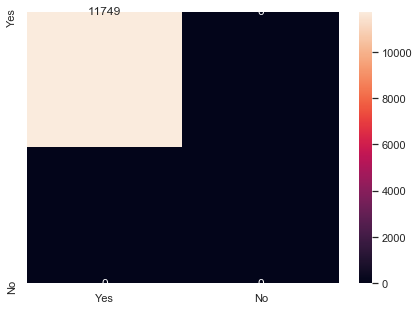

In [127]:
y_predict = rfcl.predict(x_test)
print("Random Forest")
df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [128]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, y_predict))

Total Accuracy :  0.9072544971984665


In [129]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95     12013
           2       0.63      0.45      0.52      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564



In [119]:
print("The Ensemble techniques seem to overall have more accuracy than the base models based on performance and accuracy, with all performing over 0.9")

The Ensemble techniques seem to overall have more accuracy than the base models based on performance and accuracy, with all performing over 0.9


In [130]:
print("The performances of the ensemble decision trees in ascending order are: Decision Tree, Pruned Decision Tree, Gradient Boosting, Random Forest and Bagging Classifier")

The performances of the ensemble decision trees in ascending order are: Decision Tree, Pruned Decision Tree, Gradient Boosting, Random Forest and Bagging Classifier
